<a href="https://colab.research.google.com/github/bhavika67/soft_computing/blob/main/ACO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ant Colony optimisation

Ant Colony Optimization (ACO) is a nature-inspired optimization algorithm based on the foraging behavior of ants, specifically how ants find the shortest path between their colony and a food source. It was introduced by Marco Dorigo in the early 1990s as a part of his PhD research and has since been widely applied to combinatorial optimization problems like the traveling salesman problem (TSP), vehicle routing problem (VRP), and network routing.

Best path found: [0, 4, 1, 6, 9, 7, 2, 8, 3, 5, 0] with distance 290.3067737777875


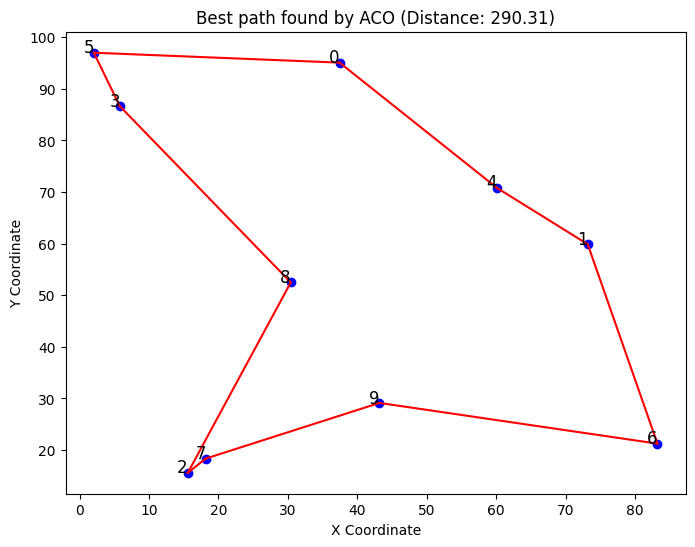

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Initialize ACO Parameters
class ACO:
    def __init__(self, num_ants, num_iterations, alpha, beta, evaporation, pheromone_init, cities, distances):
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.alpha = alpha  # Influence of pheromone
        self.beta = beta  # Influence of distance (heuristic)
        self.evaporation = evaporation  # Evaporation rate
        self.pheromone_init = pheromone_init  # Initial pheromone value
        self.cities = cities  # Coordinates of the cities
        self.distances = distances  # Distance matrix between cities
        self.num_cities = len(cities)
        self.pheromone = np.full((self.num_cities, self.num_cities), pheromone_init)  # Pheromone matrix
        self.best_distance = np.inf
        self.best_path = []

    # Step 2: Generate Path Probabilistically
    def generate_ant_path(self):
        path = [np.random.randint(self.num_cities)]
        for _ in range(self.num_cities - 1):
            current_city = path[-1]
            probabilities = self.calculate_transition_probabilities(current_city, path)
            next_city = np.random.choice(range(self.num_cities), p=probabilities)
            path.append(next_city)
        path.append(path[0])  # Return to the start
        return path

    # Transition probabilities based on pheromone and distance (heuristic)
    def calculate_transition_probabilities(self, current_city, visited):
        pheromone_row = self.pheromone[current_city]
        distances_row = self.distances[current_city]
        probabilities = np.zeros(self.num_cities)

        for city in range(self.num_cities):
            if city not in visited:
                probabilities[city] = (pheromone_row[city] ** self.alpha) * ((1.0 / distances_row[city]) ** self.beta)

        return probabilities / probabilities.sum()

    # Step 3: Pheromone Update (Global and Local)
    def update_pheromones(self, all_paths):
        # Global pheromone evaporation
        self.pheromone *= (1 - self.evaporation)

        for path, distance in all_paths:
            for i in range(len(path) - 1):
                from_city, to_city = path[i], path[i + 1]
                # Increase pheromone on path taken by each ant
                self.pheromone[from_city][to_city] += 1.0 / distance
                self.pheromone[to_city][from_city] += 1.0 / distance  # Undirected

    # Calculate the total distance of a path
    def calculate_distance(self, path):
        return sum(self.distances[path[i], path[i+1]] for i in range(len(path) - 1))

    # Step 4: Execute ACO Optimization and Visualization
    def optimize(self):
        for _ in range(self.num_iterations):
            all_paths = []
            for _ in range(self.num_ants):
                path = self.generate_ant_path()
                distance = self.calculate_distance(path)
                all_paths.append((path, distance))

                # Update best path if found
                if distance < self.best_distance:
                    self.best_distance = distance
                    self.best_path = path

            # Update pheromone matrix after all ants have moved
            self.update_pheromones(all_paths)

        print(f"Best path found: {self.best_path} with distance {self.best_distance}")
        return self.best_path, self.best_distance

    # Visualize the path found by ACO
    def plot(self):
        plt.figure(figsize=(8, 6))
        for i, city in enumerate(self.cities):
            plt.plot(city[0], city[1], 'bo')
            plt.text(city[0], city[1], f'{i}', fontsize=12, ha='right')

        for i in range(len(self.best_path) - 1):
            from_city = self.best_path[i]
            to_city = self.best_path[i + 1]
            plt.plot([self.cities[from_city][0], self.cities[to_city][0]],
                     [self.cities[from_city][1], self.cities[to_city][1]], 'r-')

        plt.title(f"Best path found by ACO (Distance: {self.best_distance:.2f})")
        plt.xlabel("X Coordinate")
        plt.ylabel("Y Coordinate")
        plt.show()

# Problem Setup (Example with random cities)
num_cities = 10
np.random.seed(42)  # For reproducibility
cities = np.random.rand(num_cities, 2) * 100  # Random city coordinates
distances = np.sqrt(((cities[:, np.newaxis, :] - cities[np.newaxis, :, :]) ** 2).sum(axis=2))

# ACO Parameters
num_ants = 20
num_iterations = 100
alpha = 1.0
beta = 2.0
evaporation = 0.5
pheromone_init = 0.01

# Run ACO Algorithm
aco = ACO(num_ants, num_iterations, alpha, beta, evaporation, pheromone_init, cities, distances)
best_path, best_distance = aco.optimize()
aco.plot()
